# OMSCS CS7641
# Machine Learning
# Allan Hammer
# Project 2

### Why?
The purpose of this project is to explore random search. As always, it is important to realize that understanding an algorithm or technique requires more than reading about that algorithm or even implementing it. One should actually have experience seeing how it behaves under a variety of circumstances.

As such, you will be asked to implement or steal several randomized search algorithms. In addition, you will be asked to exercise your creativity in coming up with problems that exercise the strengths of each.

As always, you may program in any language that you wish insofar as you feel the need to program. As always, it is your responsibility to make sure that we can actually recreate your narrative if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
import mlrose_hiive
warnings.filterwarnings("ignore")

## A) Four Different Randomized Search Algorithms
For the four algorithms we must "implement", I have chosen the random_hill_climb, simulated_annealing, genetic_alg, and mimic algorithms that are in the mlrose_hiive library.

In [2]:
def random_hill_climb(problem, init_state, restarts, random_state=20170826):
    best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem=problem, max_attempts=10, curve=True,
                                                                              max_iters=500, restarts=restarts, 
                                                                              init_state=init_state, random_state=random_state)
    return best_state, best_fitness, fitness_curve

In [3]:
def simulated_annealing(problem, init_state, schedule, random_state=20170826):
    best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem=problem, max_attempts=10, curve=True,
                                                                                max_iters=500, schedule=schedule, 
                                                                               init_state=init_state, random_state=random_state)
    return best_state, best_fitness, fitness_curve

In [4]:
def genetic_alg(problem, pop_size, random_state=20170826):
    best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem=problem, max_attempts=10, curve=True,
                                                                        max_iters=500, pop_size=pop_size,
                                                                        random_state=random_state)
    return best_state, best_fitness, fitness_curve

In [5]:
def mimic(problem, pop_size, random_state=20170826):
    best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem=problem, max_attempts=10, curve=True,
                                                                   max_iters=500, pop_size=pop_size,
                                                                   random_state=random_state)
    return best_state, best_fitness, fitness_curve

## B) Three Different Optimization Problem Domains
And for the three different problem domains we have to choose, I have chosen the FourPeaks, FlipFlop, and Queens problems, also from the mlrose libray.

In [6]:
fitness1 = mlrose_hiive.FourPeaks()
fitness2 = mlrose_hiive.Queens()
fitness3 = mlrose_hiive.FlipFlop()

In [7]:
# we also have to define our problems over discrete-valued parameter spaces:
problem1 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness1, maximize=True, max_val=2)
problem2 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness2, maximize=False, max_val=100)
problem3 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness3, maximize=True, max_val=2)

## C) Fitting the Problems
Now we will fit all four algorithms to all three optimization problems and compare accordingly:

### Four Peaks
Four peaks is described as, "A problem with two local optima with wide basins of attraction designed to catch simulated annealing and random hill climbing, and two sharp global optima at the edges of the problem space. Genetic Algorithms are more likely to find these global optima than other methods" (https://bambielli.com/posts/2018-07-22-comparison-of-four-randomized-optimization-methods/).

Best Fitness Score: 5.0
Average Wall Clock Time to Run: 0.0010009288787841796 seconds


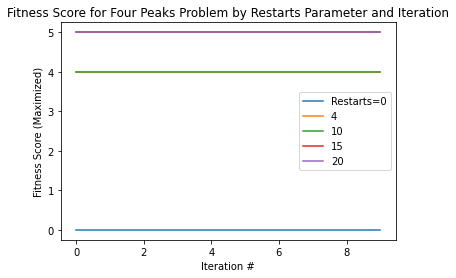

In [8]:
# random_hill_climb
restarts = [0, 5, 10, 15, 20]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problem1, init_state=None, restarts=restarts[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve1[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)
    
print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Four Peaks Problem by Restarts Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Restarts=0", "4", "10", "15", "20"])
plt.show()

In [9]:
# get the best fitness curve
fitness_curve1 = fitness_curves[4]

Best Fitness Score: 11.0
Average Wall Clock Time to Run: 0.007340033849080403 seconds


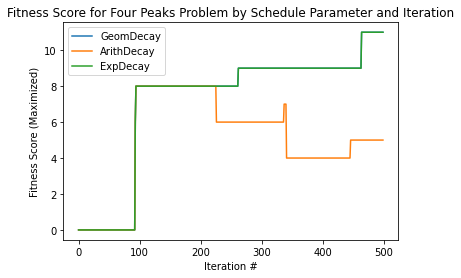

In [10]:
# simulated_annealing
schedule = [mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay(), mlrose_hiive.ExpDecay()]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problem1, schedule=schedule[i], init_state=None)

    end = time.time()
    
    fitness_curves.append(fitness_curve2[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Four Peaks Problem by Schedule Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["GeomDecay", "ArithDecay", "ExpDecay"])
plt.show()

In [11]:
# get the best fitness curve
fitness_curve2 = fitness_curves[2]

Best Fitness Score: 130.0
Average Wall Clock Time to Run: 0.28661532402038575 seconds


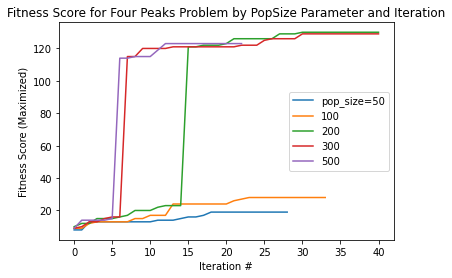

In [12]:
# genetic_alg
pop_size = [50, 100, 200, 300, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problem1, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve3[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Four Peaks Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["pop_size=50", "100", "200", "300", "500"])
plt.show()

In [13]:
# get the best fitness curve
fitness_curve3 = fitness_curves[2]

Best Fitness Score: 123.0
Average Wall Clock Time to Run: 43.50745169321696 seconds


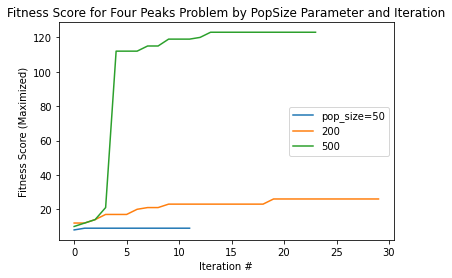

In [14]:
# mimic
pop_size = [50, 200, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problem1, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve4[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Four Peaks Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["pop_size=50", "200", "500"])
plt.show()

In [15]:
# get the best fitness curve
fitness_curve4 = fitness_curves[2]

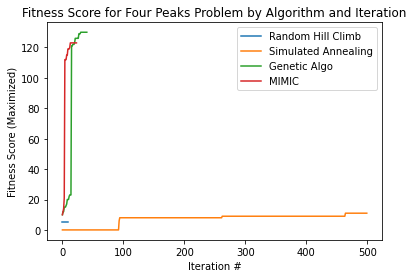

In [16]:
plt.plot(fitness_curve1)
plt.plot(fitness_curve2)
plt.plot(fitness_curve3)
plt.plot(fitness_curve4)
plt.title("Fitness Score for Four Peaks Problem by Algorithm and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

"Winner": Genetic Algorithms. Relatively fast speed and by far the best fitness scores.

### Queens
Wikipedia decription for the queens problem (the one that I find the most interesting out of these 3):

"The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal. The eight queens puzzle is an example of the more general n queens problem of placing n non-attacking queens on an n×n chessboard, for which solutions exist for all natural numbers n with the exception of n = 2 and n = 3".

(https://en.wikipedia.org/wiki/Eight_queens_puzzle)

This problem can easily be converted into a maximization problem by just setting the overall fitness desired at the end to be multiplied by -1.

Best Fitness Score: 61.0
Average Wall Clock Time to Run: 1.1080057621002197 seconds


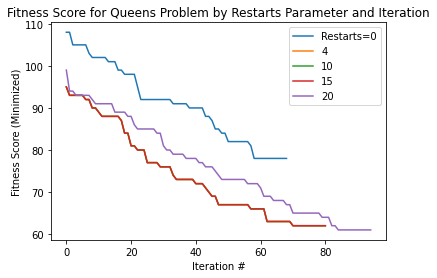

In [17]:
# random_hill_climb
restarts = [0, 5, 10, 15, 20]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problem2, init_state=None, restarts=restarts[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve1[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)
    
print("Best Fitness Score:", min(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Queens Problem by Restarts Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["Restarts=0", "4", "10", "15", "20"])
plt.show()

In [18]:
# get the best fitness curve
fitness_curve1 = fitness_curves[4]

Best Fitness Score: 44.0
Average Wall Clock Time to Run: 0.6053845087687174 seconds


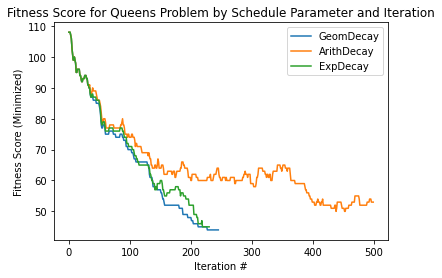

In [19]:
# simulated_annealing
schedule = [mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay(), mlrose_hiive.ExpDecay()]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problem2, schedule=schedule[i], init_state=None)

    end = time.time()
    
    fitness_curves.append(fitness_curve2[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", min(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Queens Problem by Schedule Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["GeomDecay", "ArithDecay", "ExpDecay"])
plt.show()

In [20]:
# get the best fitness curve
fitness_curve2 = fitness_curves[0]

Best Fitness Score: 19.0
Average Wall Clock Time to Run: 16.17248640060425 seconds


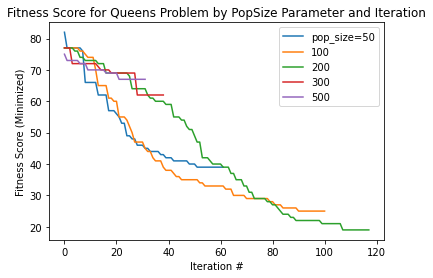

In [21]:
# genetic_alg
pop_size = [50, 100, 200, 300, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problem2, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve3[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", min(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Queens Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["pop_size=50", "100", "200", "300", "500"])
plt.show()

In [22]:
# get the best fitness curve
fitness_curve3 = fitness_curves[2]

Best Fitness Score: 55.0
Average Wall Clock Time to Run: 37.52797929445902 seconds


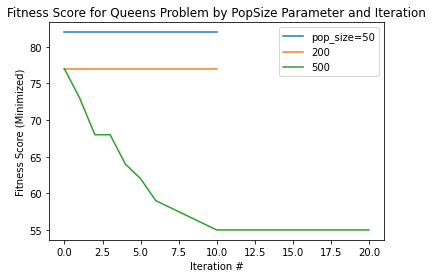

In [23]:
# mimic
pop_size = [50, 200, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problem2, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve4[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", min(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Queens Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["pop_size=50", "200", "500"])
plt.show()

In [24]:
# get the best fitness curve
fitness_curve4 = fitness_curves[2]

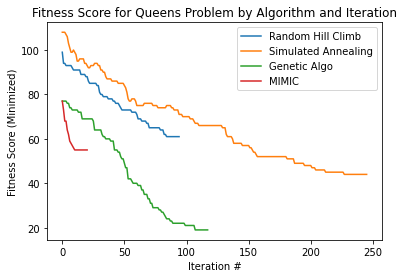

In [25]:
plt.plot(fitness_curve1)
plt.plot(fitness_curve2)
plt.plot(fitness_curve3)
plt.plot(fitness_curve4)
plt.title("Fitness Score for Queens Problem by Algorithm and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

"Winner": Genetic algorithms...for now. Because of the big mismatches in GA depending on what pop size we use, I feel like this does not tell the whole story, and a further deep dive needs to be done.

### Flip Flop
Flip Flop is, "a problem that counts the number of times of bits alternation in a bit string, i.e., from a number to any other number in the next digit is counted as 1. A maximum fitness bit string would be one that consists entirely of alternating digits" (https://medium.com/@duoduoyunnini/introduction-implementation-and-comparison-of-four-randomized-optimization-algorithms-fc4d96f9feea).

Best Fitness Score: 77.0
Average Wall Clock Time to Run: 0.06317377090454102 seconds


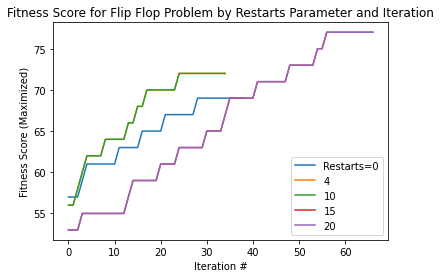

In [26]:
# random_hill_climb
restarts = [0, 5, 10, 15, 20]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problem3, init_state=None, restarts=restarts[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve1[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)
    
print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Flip Flop Problem by Restarts Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Restarts=0", "4", "10", "15", "20"])
plt.show()

In [27]:
# get the best fitness curve
fitness_curve1 = fitness_curves[4]

Best Fitness Score: 84.0
Average Wall Clock Time to Run: 0.09375842412312825 seconds


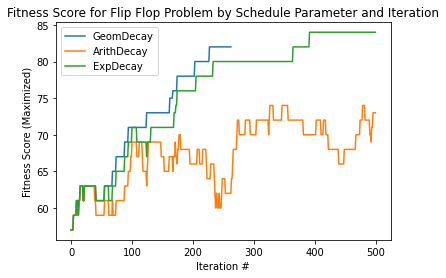

In [28]:
# simulated_annealing
schedule = [mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay(), mlrose_hiive.ExpDecay()]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problem3, schedule=schedule[i], init_state=None)

    end = time.time()
    
    fitness_curves.append(fitness_curve2[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Flip Flop Problem by Schedule Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["GeomDecay", "ArithDecay", "ExpDecay"])
plt.show()

In [29]:
# get the best fitness curve
fitness_curve2 = fitness_curves[2]

Best Fitness Score: 91.0
Average Wall Clock Time to Run: 1.3599267482757569 seconds


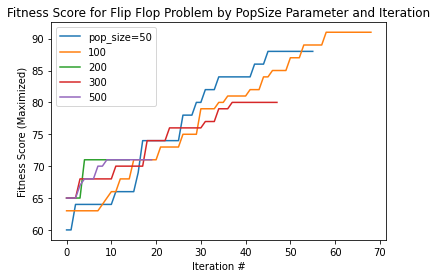

In [30]:
# genetic_alg
pop_size = [50, 100, 200, 300, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problem3, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve3[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.plot(fitness_curves[3])
plt.plot(fitness_curves[4])
plt.title("Fitness Score for Flip Flop Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["pop_size=50", "100", "200", "300", "500"])
plt.show()

In [31]:
# get the best fitness curve
fitness_curve3 = fitness_curves[1]

Best Fitness Score: 95.0
Average Wall Clock Time to Run: 40.85377017656962 seconds


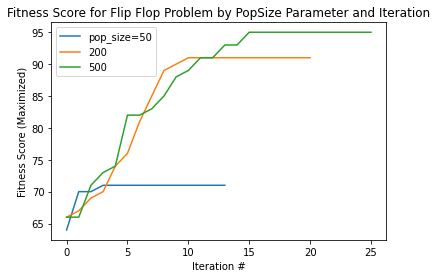

In [32]:
# mimic
pop_size = [50, 200, 500]
fitness_curves = []
times = []
best_fits = []

for i in range(3):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problem3, pop_size=pop_size[i])

    end = time.time()
    
    fitness_curves.append(fitness_curve4[:,0])
    times.append(end-start)
    best_fits.append(best_fitness)

print("Best Fitness Score:", max(best_fits))
print("Average Wall Clock Time to Run:", np.mean(times), "seconds")

plt.plot(fitness_curves[0])
plt.plot(fitness_curves[1])
plt.plot(fitness_curves[2])
plt.title("Fitness Score for Flip Flop Problem by PopSize Parameter and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["pop_size=50", "200", "500"])
plt.show()

In [33]:
# get the best fitness curve
fitness_curve4 = fitness_curves[2]

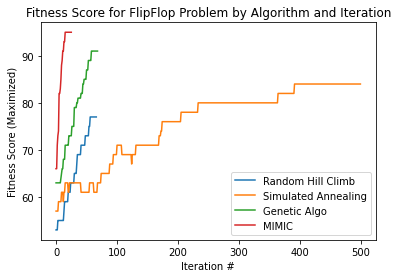

In [34]:
plt.plot(fitness_curve1)
plt.plot(fitness_curve2)
plt.plot(fitness_curve3)
plt.plot(fitness_curve4)
plt.title("Fitness Score for FlipFlop Problem by Algorithm and Iteration")
plt.xlabel("Iteration #")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

"Winner": MIMIC...for now. Just like with Queens, I think a further deep dive needs to solidify this.

We've determined from these quick plots that the Four Peaks problem has a clear winner, but we need a bit more info for the other two. Let's dive a bit deeper into problem size and time to compute:

### Four Peaks Deep Dive

In [35]:
fitness1 = mlrose_hiive.FourPeaks()

In [36]:
# now we define 5 different problem sizes for Four Peaks
problem1 = mlrose_hiive.DiscreteOpt(length=10, fitness_fn=fitness1, maximize=True, max_val=2)
problem2 = mlrose_hiive.DiscreteOpt(length=25, fitness_fn=fitness1, maximize=True, max_val=2)
problem3 = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness1, maximize=True, max_val=2)
problem4 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness1, maximize=True, max_val=2)
problem5 = mlrose_hiive.DiscreteOpt(length=200, fitness_fn=fitness1, maximize=True, max_val=2)

problems = [problem1, problem2, problem3, problem4, problem5]

lengths = [10, 25, 50, 100, 200]

In [37]:
# random_hill_climb
best_fitness_hill_climb = []
times_hill_climb = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problems[i], restarts=20, init_state=None)
    best_fitness_hill_climb.append(best_fitness)

    end = time.time()
    
    times_hill_climb.append(end-start)

In [38]:
# simulated_annealing
best_fitness_simulated_annealing = []
times_simulated_annealing = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problems[i], schedule=mlrose_hiive.ExpDecay(),
                                                                   init_state=None)
    best_fitness_simulated_annealing.append(best_fitness)

    end = time.time()

    times_simulated_annealing.append(end-start)

In [39]:
# genetic_alg
best_fitness_genetic = []
times_hill_genetic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problems[i], pop_size=200)
    best_fitness_genetic.append(best_fitness)

    end = time.time()
    
    times_hill_genetic.append(end-start)

In [40]:
# mimic
best_fitness_mimic = []
times_hill_mimic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problems[i], pop_size=500)
    best_fitness_mimic.append(best_fitness)

    end = time.time()
    
    times_hill_mimic.append(end-start)

In [41]:
df_peaks_fitness = pd.DataFrame(
{
    'lengths': lengths,
    'best_fitness_hill_climb': best_fitness_hill_climb,
    'best_fitness_simulated_annealing': best_fitness_simulated_annealing,
    'best_fitness_genetic': best_fitness_genetic,
    'best_fitness_mimic': best_fitness_mimic,
})

df_peaks_times = pd.DataFrame(
{
    'lengths': lengths,
    'times_hill_climb': times_hill_climb,
    'times_simulated_annealing': times_simulated_annealing,
    'times_hill_genetic': times_hill_genetic,
    'times_hill_mimic': times_hill_mimic,
})

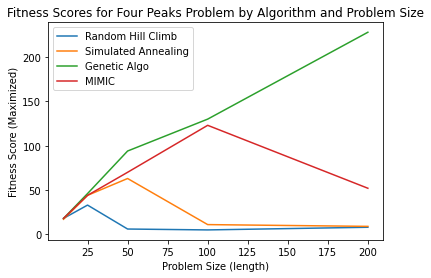

In [42]:
plt.plot(df_peaks_fitness['lengths'], df_peaks_fitness[['best_fitness_hill_climb', 'best_fitness_simulated_annealing', 
                                                            'best_fitness_genetic', 'best_fitness_mimic']])
plt.title("Fitness Scores for Four Peaks Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

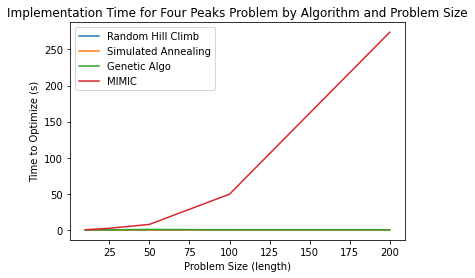

In [43]:
plt.plot(df_peaks_times['lengths'], df_peaks_times[['times_hill_climb', 'times_simulated_annealing', 
                                                            'times_hill_genetic', 'times_hill_mimic']])
plt.title("Implementation Time for Four Peaks Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Time to Optimize (s)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

This all but confirms that  GA is the way to go for Four Peaks!

### Queens Deep Dive

In [44]:
fitness2 = mlrose_hiive.Queens()

In [45]:
# now we define 5 different problem sizes for Queens
problem1 = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness2, maximize=False, max_val=8)
problem2 = mlrose_hiive.DiscreteOpt(length=20, fitness_fn=fitness2, maximize=False, max_val=20)
problem3 = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness2, maximize=False, max_val=50)
problem4 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness2, maximize=False, max_val=100)
problem5 = mlrose_hiive.DiscreteOpt(length=200, fitness_fn=fitness2, maximize=False, max_val=200)

problems = [problem1, problem2, problem3, problem4, problem5]

lengths = [8, 20, 50, 100, 200]

In [46]:
# random_hill_climb
best_fitness_hill_climb = []
times_hill_climb = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problems[i], restarts=20, init_state=None)
    best_fitness_hill_climb.append(best_fitness)

    end = time.time()
    
    times_hill_climb.append(end-start)

In [47]:
# simulated_annealing
best_fitness_simulated_annealing = []
times_simulated_annealing = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problems[i], schedule=mlrose_hiive.GeomDecay(),
                                                                   init_state=None)
    best_fitness_simulated_annealing.append(best_fitness)

    end = time.time()

    times_simulated_annealing.append(end-start)

In [48]:
# genetic_alg
best_fitness_genetic = []
times_hill_genetic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problems[i], pop_size=200)
    best_fitness_genetic.append(best_fitness)

    end = time.time()
    
    times_hill_genetic.append(end-start)

In [49]:
# mimic
best_fitness_mimic = []
times_hill_mimic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problems[i], pop_size=500)
    best_fitness_mimic.append(best_fitness)

    end = time.time()
    
    times_hill_mimic.append(end-start)

In [50]:
df_queens_fitness = pd.DataFrame(
{
    'lengths': lengths,
    'best_fitness_hill_climb': best_fitness_hill_climb,
    'best_fitness_simulated_annealing': best_fitness_simulated_annealing,
    'best_fitness_genetic': best_fitness_genetic,
    'best_fitness_mimic': best_fitness_mimic,
})

df_queens_times = pd.DataFrame(
{
    'lengths': lengths,
    'times_hill_climb': times_hill_climb,
    'times_simulated_annealing': times_simulated_annealing,
    'times_hill_genetic': times_hill_genetic,
    'times_hill_mimic': times_hill_mimic,
})

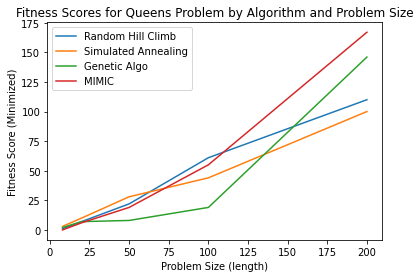

In [51]:
plt.plot(df_queens_fitness['lengths'], df_queens_fitness[['best_fitness_hill_climb', 'best_fitness_simulated_annealing', 
                                                            'best_fitness_genetic', 'best_fitness_mimic']])
plt.title("Fitness Scores for Queens Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Fitness Score (Minimized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

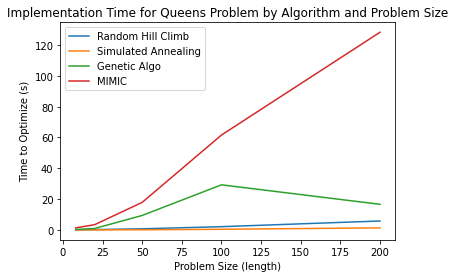

In [52]:
plt.plot(df_queens_times['lengths'], df_queens_times[['times_hill_climb', 'times_simulated_annealing', 
                                                            'times_hill_genetic', 'times_hill_mimic']])
plt.title("Implementation Time for Queens Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Time to Optimize (s)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

Recall from before that we had a sort of had an idea that GA was performing better than the rest, but we also had our suspicions. These plots show that SA outperforms GA at every problem set size using the optimal parameters, so it makes a comeback victory in the end and is worth the time constraints!

### Flip Flop Deep Dive

In [53]:
fitness3 = mlrose_hiive.FlipFlop()

In [54]:
# now we define 5 different problem sizes for Queens
problem1 = mlrose_hiive.DiscreteOpt(length=10, fitness_fn=fitness3, maximize=True, max_val=2)
problem2 = mlrose_hiive.DiscreteOpt(length=25, fitness_fn=fitness3, maximize=True, max_val=2)
problem3 = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness3, maximize=True, max_val=2)
problem4 = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness3, maximize=True, max_val=2)
problem5 = mlrose_hiive.DiscreteOpt(length=200, fitness_fn=fitness3, maximize=True, max_val=2)

problems = [problem1, problem2, problem3, problem4, problem5]

lengths = [10, 25, 50, 100, 200]

In [55]:
# random_hill_climb
best_fitness_hill_climb = []
times_hill_climb = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve1 = random_hill_climb(problems[i], restarts=20, init_state=None)
    best_fitness_hill_climb.append(best_fitness)

    end = time.time()
    
    times_hill_climb.append(end-start)

In [56]:
# simulated_annealing
best_fitness_simulated_annealing = []
times_simulated_annealing = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve2 = simulated_annealing(problems[i], schedule=mlrose_hiive.ExpDecay(),
                                                                   init_state=None)
    best_fitness_simulated_annealing.append(best_fitness)

    end = time.time()

    times_simulated_annealing.append(end-start)

In [57]:
# genetic_alg
best_fitness_genetic = []
times_hill_genetic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve3 = genetic_alg(problems[i], pop_size=100)
    best_fitness_genetic.append(best_fitness)

    end = time.time()
    
    times_hill_genetic.append(end-start)

In [58]:
# mimic
best_fitness_mimic = []
times_hill_mimic = []

for i in range(5):
    start = time.time()

    best_state, best_fitness, fitness_curve4 = mimic(problems[i], pop_size=500)
    best_fitness_mimic.append(best_fitness)

    end = time.time()
    
    times_hill_mimic.append(end-start)

In [59]:
df_flipflop_fitness = pd.DataFrame(
{
    'lengths': lengths,
    'best_fitness_hill_climb': best_fitness_hill_climb,
    'best_fitness_simulated_annealing': best_fitness_simulated_annealing,
    'best_fitness_genetic': best_fitness_genetic,
    'best_fitness_mimic': best_fitness_mimic,
})

df_flipflop_times = pd.DataFrame(
{
    'lengths': lengths,
    'times_hill_climb': times_hill_climb,
    'times_simulated_annealing': times_simulated_annealing,
    'times_hill_genetic': times_hill_genetic,
    'times_hill_mimic': times_hill_mimic,
})

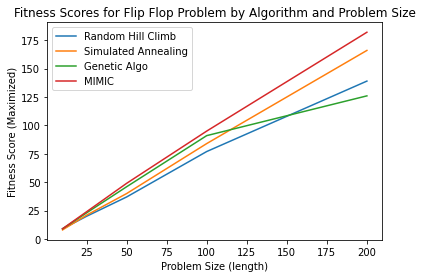

In [60]:
plt.plot(df_flipflop_fitness['lengths'], df_flipflop_fitness[['best_fitness_hill_climb', 'best_fitness_simulated_annealing', 
                                                            'best_fitness_genetic', 'best_fitness_mimic']])
plt.title("Fitness Scores for Flip Flop Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Fitness Score (Maximized)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

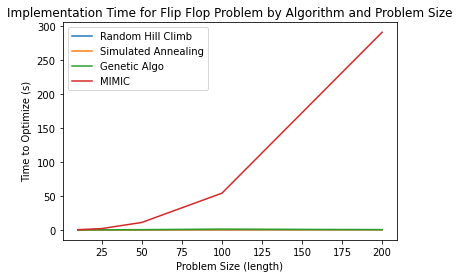

In [61]:
plt.plot(df_flipflop_times['lengths'], df_flipflop_times[['times_hill_climb', 'times_simulated_annealing', 
                                                            'times_hill_genetic', 'times_hill_mimic']])
plt.title("Implementation Time for Flip Flop Problem by Algorithm and Problem Size")
plt.xlabel("Problem Size (length)")
plt.ylabel("Time to Optimize (s)")
plt.legend(["Random Hill Climb", "Simulated Annealing", "Genetic Algo", "MIMIC"])
plt.show()

In the fitness section, MIMIC still outperforms everything, every step of the way. In terms of raw power and setting time aside, MIMIC wins here.

## D) Neural Networks - Project 1 Revisited

### Dataset 1 - Adult

First, we have to recreate the same dataset and the same NN that we used in project 1 using MLRose as accurately as possible, which is done below using the supplied gradient descent algorithm:

In [62]:
## get dataset and problem (dataset 2 of project 1)
# dataset 1
# https://www.kaggle.com/wenruliu/adult-income-dataset
dat = pd.read_csv("adult.csv")
print("Blind guessing should get you a minimum of: ", (37155/(37155+11687))*100, "% accuracy.")
data = pd.get_dummies(dat)
y = data['income_>50K']
X = data.drop(['income_>50K', 'income_<=50K'], axis=1)

# split into train and test (we will use the test for all final testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05)

# LEARNING CURVES
validation_sizes = [.05, .10, .20, .33, .5]

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

Blind guessing should get you a minimum of:  76.07182343065395 % accuracy.


In [63]:
train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.fitness_curve)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [64]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

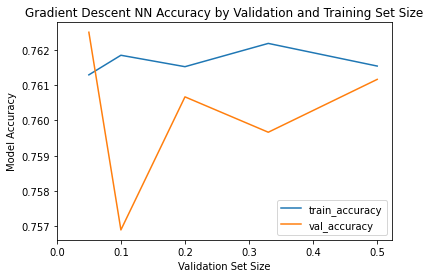

In [65]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('Gradient Descent NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

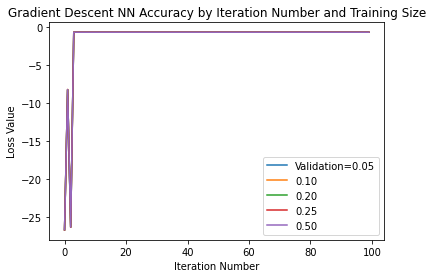

In [66]:
for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('Gradient Descent NN Accuracy by Iteration Number and Training Size')
# plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

In [67]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = hidden_layer_sizes[i], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


In [68]:
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))

In [69]:
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

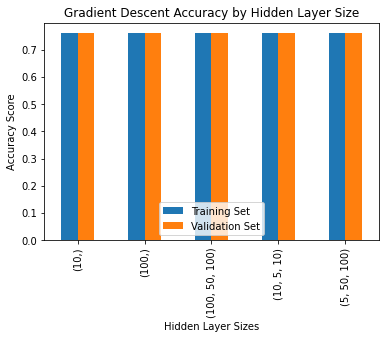

In [70]:
hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('Gradient Descent Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

In [71]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = activation[i], \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


In [72]:
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))

In [73]:
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

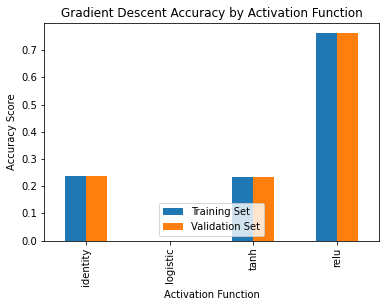

In [74]:
activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('Gradient Descent Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

In [75]:
# from the plots, we choose our best parameters for
# gradient descent
# as a default (100,) hidden layter size and an activation of relu
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Gradient Descent:", mlp_final.fitted_weights)
print("Final Loss for Gradient Descent:", mlp_final.loss)

Time to Model: 0.665212345123291 minutes
Final MLP Test Accuracy: 0.748669668440442
Best Weights for Gradient Descent: [-1.00000000e+10 -7.48634693e-01 -9.63792358e+02 ... -1.00000000e+10
 -4.44538342e+08 -1.00000000e+10]
Final Loss for Gradient Descent: 0.6931471805599453


Now that we have this baseline, we can compare this final architecture to all of the alogorithms (except MIMIC) explored in project 2:

### NN Random Hill Climb

In [76]:
# from the plots, we choose our best parameters for
# Random Hill Climb
# as a default (100,) hidden layter size and an activation of relu
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'random_hill_climb',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Random Hill Climb:", mlp_final.fitted_weights)
print("Final Loss for Random Hill Climb:", mlp_final.loss)

Time to Model: 0.2198514183362325 minutes
Final MLP Test Accuracy: 0.24232501023331968
Best Weights for Random Hill Climb: [ 0.84902581 -0.74863469  0.79819264 ...  0.77570601  0.25569512
  0.43458308]
Final Loss for Random Hill Climb: 26.644424485250035


### NN Simulated Annealing

In [77]:
# from the plots, we choose our best parameters for
# simulated_annealing
# as a default (100,) hidden layter size and an activation of relu
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'simulated_annealing',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Gradient Descent:", mlp_final.fitted_weights)
print("Final Loss for Gradient Descent:", mlp_final.loss)

Time to Model: 0.43507588307062783 minutes
Final MLP Test Accuracy: 0.2394596807204257
Best Weights for Gradient Descent: [ 0.84902581 -0.74863469  0.79819264 ...  0.77570601  0.25569512
  0.43458308]
Final Loss for Gradient Descent: 26.683828880273815


### NN Genetic Algorithm

In [78]:
# from the plots, we choose our best parameters for
# Genetic Algo
# as a default (100,) hidden layter size and an activation of relu
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = 'relu', \
                                 algorithm = 'genetic_alg',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Genetic Algo:", mlp_final.fitted_weights)
print("Final Loss for Genetic Algo:", mlp_final.loss)

Time to Model: 44.41997747818629 minutes
Final MLP Test Accuracy: 0.7830536225951699
Best Weights for Genetic Algo: [ 6.13647889e+08 -2.10109799e+09 -7.02052999e+09 ...  5.28916516e+09
 -8.72832789e+09 -2.94068419e+09]
Final Loss for Genetic Algo: 7.0210755399969305


### Dataset 2 - Diabetes
What about our other dataset? Remember this one had the advantage of way less categorical features but a disadvantage of limited data.

In [6]:
## get dataset and problem (dataset 2 of project 1)
# dataset 2
# https://www.kaggle.com/vikasukani/diabetes-data-set
dat = pd.read_csv("diabetes-dataset.csv")
print("Blind guessing should get you a minimum of: ", (1316/(684+1316))*100, "% accuracy.")
data = pd.get_dummies(dat)
y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05)

# LEARNING CURVES
validation_sizes = [.05, .10, .20, .33, .5]

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

Blind guessing should get you a minimum of:  65.8 % accuracy.


In [7]:
train_accuracy = []
val_accuracy = []

loss = []

for i in range(5):
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=validation_sizes[i], random_state=20170826)
    
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = [100,50,100], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)
    
    mlp.fit(X_train_new, y_train_new)
    
    loss.append(mlp.fitness_curve)
    
    predictions_train = mlp.predict(X_train_new)
    predictions_val = mlp.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_train_new, predictions_train))
    val_accuracy.append(accuracy_score(y_val, predictions_val))
    
    print("Completed round", i+1, "of 5")

Completed round 1 of 5
Completed round 2 of 5
Completed round 3 of 5
Completed round 4 of 5
Completed round 5 of 5


In [8]:
training_df = pd.DataFrame(
    {'train_accuracy': train_accuracy,
     'val_accuracy': val_accuracy,
     'validation_sizes': validation_sizes}
)

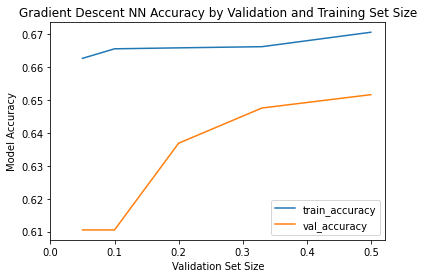

In [9]:
plt.plot(training_df["validation_sizes"], training_df[["train_accuracy", "val_accuracy"]])
plt.xlabel('Validation Set Size')
plt.ylabel('Model Accuracy')
plt.title('Gradient Descent NN Accuracy by Validation and Training Set Size')
plt.xticks([0,.1,.2,.3,.4,.5])
plt.legend(['train_accuracy', "val_accuracy"])
plt.show()

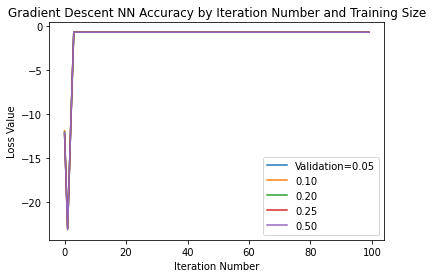

In [10]:
for l in loss:
    plt.plot(l)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.title('Gradient Descent NN Accuracy by Iteration Number and Training Size')
# plt.xticks(np.arange(0,51,10))
plt.legend(['Validation=0.05', "0.10", "0.20", "0.25", "0.50"])
plt.show()

In [11]:
# first we do hidden_layer_sizes
hidden_layer_sizes = [(10,), (100,), (100,50,100), (10,5,10), (5,50,100)]

scores_train = []
scores_val = []

for i in range(5):
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = hidden_layer_sizes[i], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())

    print("Completed Round", i+1, "of 5.")

Completed Round 1 of 5.
Completed Round 2 of 5.
Completed Round 3 of 5.
Completed Round 4 of 5.
Completed Round 5 of 5.


In [12]:
hidden_layer_sizes_cats = []
for i in range(5):
    hidden_layer_sizes_cats.append(str(hidden_layer_sizes[i]))

In [13]:
hidden_layers_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'hidden_layer_sizes': hidden_layer_sizes_cats}
)
hidden_layers_df['hidden_layer_sizes'] = hidden_layers_df['hidden_layer_sizes'].astype('category')

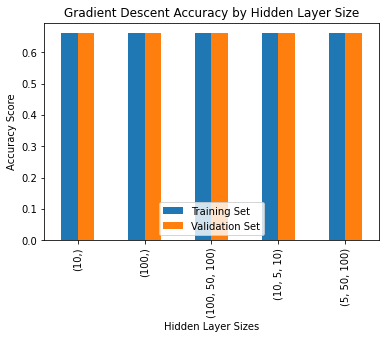

In [14]:
hidden_layers_df.plot.bar(x="hidden_layer_sizes")
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy Score')
plt.title('Gradient Descent Accuracy by Hidden Layer Size')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

In [15]:
# let's try one more parameter - 
activation = ['identity', 'logistic', 'tanh', 'relu']

scores_train = []
scores_val = []

for i in range(4):
    mlp = mlrose_hiive.NeuralNetwork(hidden_nodes = [100], activation = activation[i], \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

    scores = cross_validate(mlp, X_train, y_train, cv=5, return_train_score=True)

    scores_train.append(scores['train_score'].mean())
    scores_val.append(scores['test_score'].mean())
        
    print("Completed Round", i+1, "of 4.")

Completed Round 1 of 4.
Completed Round 2 of 4.
Completed Round 3 of 4.
Completed Round 4 of 4.


In [16]:
activation_cats = []
for i in range(4):
    activation_cats.append(str(activation[i]))

In [17]:
activations_df = pd.DataFrame(
    {'scores_train': scores_train,
     'scores_val': scores_val,
     'activation': activation_cats}
)
activations_df['activation'] = activations_df['activation'].astype('category')

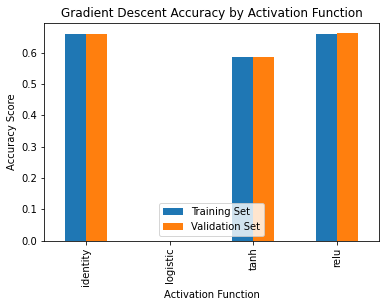

In [18]:
activations_df.plot.bar(x="activation")
plt.xlabel('Activation Function')
plt.ylabel('Accuracy Score')
plt.title('Gradient Descent Accuracy by Activation Function')
plt.legend(["Training Set", "Validation Set"], loc='lower center')
plt.show()

In [19]:
# from the plots, we choose our best parameters for
# gradient descent
# as a default (100,50,100) hidden layter size and an activation of tanh
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100,50,100], activation = 'relu', \
                                 algorithm = 'gradient_descent',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Gradient Descent:", mlp_final.fitted_weights)
print("Final Loss for Gradient Descent:", mlp_final.loss)

Time to Model: 0.03443828821182251 minutes
Final MLP Test Accuracy: 0.62
Best Weights for Gradient Descent: [-1.00000000e+10 -7.48634693e-01 -1.00000000e+10 ... -1.00000000e+10
  2.55695120e-01 -1.00000000e+10]
Final Loss for Gradient Descent: 0.6931471805599453


Now that we have this baseline, we can compare this final architecture to all of the alogorithms (except MIMIC) explored in project 2:

### NN Random Hill Climb

In [20]:
# from the plots, we choose our best parameters for
# Random Hill Climb
# as a default (100,50,100) hidden layter size and an activation of tanh
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100,50,100], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Random Hill Climb:", mlp_final.fitted_weights)
print("Final Loss for Random Hill Climb:", mlp_final.loss)

Time to Model: 0.011071900526682535 minutes
Final MLP Test Accuracy: 0.56
Best Weights for Random Hill Climb: [ 0.84902581 -0.74863469  0.79819264 ...  0.77570601  0.25569512
  0.43458308]
Final Loss for Random Hill Climb: 12.046333154104824


### NN Simulated Annealing

In [21]:
# from the plots, we choose our best parameters for
# simulated_annealing
# as a default (100,50,100) hidden layter size and an activation of tanh
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100,50,100], activation = 'relu', \
                                 algorithm = 'simulated_annealing',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Gradient Descent:", mlp_final.fitted_weights)
print("Final Loss for Gradient Descent:", mlp_final.loss)

Time to Model: 0.023019059499104818 minutes
Final MLP Test Accuracy: 0.54
Best Weights for Gradient Descent: [ 0.84902581 -0.74863469  0.79819264 ...  0.77570601  0.25569512
  0.43458308]
Final Loss for Gradient Descent: 12.080912816983018


### NN Genetic Algorithm

In [22]:
# from the plots, we choose our best parameters for
# Genetic Algo
# as a default (100,50,100) hidden layter size and an activation of tanh
start = time.time()

mlp_final = mlrose_hiive.NeuralNetwork(hidden_nodes = [100,50,100], activation = 'relu', \
                                 algorithm = 'genetic_alg',
                                 random_state = 20170826, curve=True)

mlp_final.fit(X_train, y_train)
predictions = mlp_final.predict(X_test)
final_score = accuracy_score(y_test, predictions)

end = time.time()

print("Time to Model:", (end-start)/60, "minutes")
print("Final MLP Test Accuracy:", final_score)
print("Best Weights for Genetic Algo:", mlp_final.fitted_weights)
print("Final Loss for Genetic Algo:", mlp_final.loss)

Time to Model: 2.9581918358802795 minutes
Final MLP Test Accuracy: 0.64
Best Weights for Genetic Algo: [ 4.80897617e+09 -7.90614706e+09 -7.32051193e+09 ... -1.78526566e+09
  5.32294151e+09  8.21426311e+09]
Final Loss for Genetic Algo: 10.779756621285928


***Models on these datasets FINISHED***